In [2]:
# Practical 2: CNN Model for MNIST Dataset

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:

# Step 2: Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# Step 3: Define CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

C:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:

# Step 5: Train the Model
history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                    validation_data=(x_test, y_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9094 - loss: 0.2968 - val_accuracy: 0.9812 - val_loss: 0.0607
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9720 - loss: 0.0945 - val_accuracy: 0.9877 - val_loss: 0.0376
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9802 - loss: 0.0674 - val_accuracy: 0.9890 - val_loss: 0.0315
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9821 - loss: 0.0585 - val_accuracy: 0.9886 - val_loss: 0.0317
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9853 - loss: 0.0483 - val_accuracy: 0.9906 - val_loss: 0.0265
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9872 - loss: 0.0419 - val_accuracy: 0.9898 - val_loss: 0.0295
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9884 - loss: 0.0366 - val_accuracy: 0.9918 - val_loss: 0.0243
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9900 - loss: 0.0326 - 

In [7]:

# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)

313/313 - 3s - 8ms/step - accuracy: 0.9927 - loss: 0.0223

Test Accuracy: 0.9926999807357788


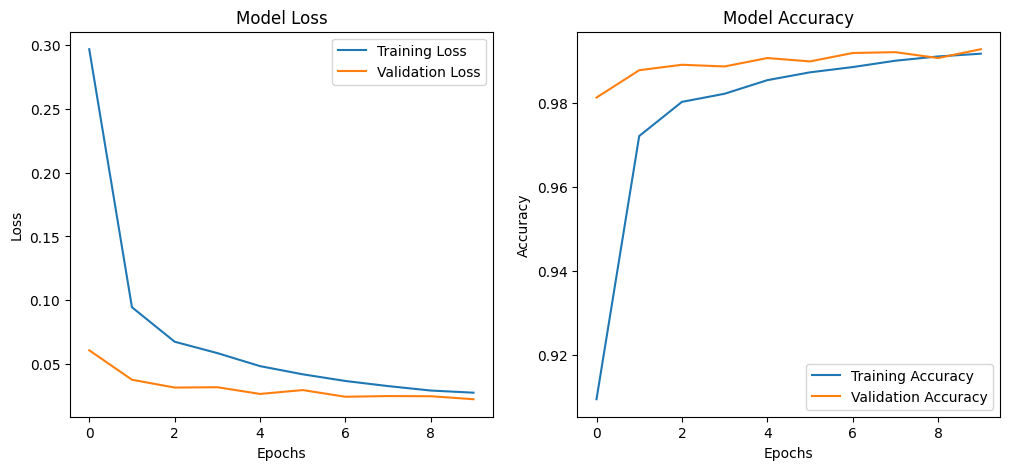

In [8]:

# Step 7: Plot Loss and Accuracy Graphs
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [9]:

# ------------------------------------------------------------
# EXPLANATION OF EACH STEP
# ------------------------------------------------------------
# Step 1: Import Libraries
# - TensorFlow/Keras used for building CNN architecture.
# - Matplotlib used for plotting performance graphs.

# Step 2: Load and Preprocess Data
# - MNIST data is reshaped to include 1 channel (28x28x1) for grayscale.
# - Normalized pixel values to 0–1 range.
# - Labels are one-hot encoded (e.g., 3 -> [0,0,0,1,0,0,0,0,0,0]).

# Step 3: Define Model Architecture
# - Conv2D layers extract spatial features from images.
# - MaxPooling2D reduces dimensionality, making the model faster and generalizable.
# - Flatten converts 2D feature maps to 1D vector.
# - Dense(128, relu): fully connected layer.
# - Dropout(0.5): prevents overfitting by randomly deactivating 50% neurons.
# - Output layer uses Softmax for 10-class probability distribution.

# Step 4: Compile the Model
# - Optimizer: Adam (efficient gradient-based optimizer).
# - Loss: categorical_crossentropy (multi-class classification with one-hot labels).
# - Metric: accuracy.

# Step 5: Train the Model
# - Trains model for 10 epochs with batch size 128.
# - Validation data checks unseen performance after each epoch.

# Step 6: Evaluate the Model
# - Tests model performance on unseen test data.
# - CNN usually achieves ~99% accuracy on MNIST dataset.

# Step 7: Plot Graphs
# - Training vs Validation loss and accuracy over epochs.
# - Helps visualize learning progress and check for overfitting.

# ------------------------------------------------------------
# VIVA QUESTIONS
# ------------------------------------------------------------
# Q1. What is a CNN?
#     -> Convolutional Neural Network, designed to process image data by extracting spatial features.
# Q2. What is the role of Conv2D layer?
#     -> Applies filters (kernels) to learn image features like edges and shapes.
# Q3. What does MaxPooling2D do?
#     -> Reduces the size of feature maps to make computations faster.
# Q4. Why use ReLU activation?
#     -> Adds non-linearity and prevents negative activations.
# Q5. What does Dropout do?
#     -> Randomly drops neurons during training to prevent overfitting.
# Q6. Why Softmax in output layer?
#     -> Converts outputs to class probabilities for multi-class classification.
# Q7. Why use Adam optimizer?
#     -> Combines benefits of RMSProp and Momentum; faster and adaptive.
# Q8. What accuracy is expected?
#     -> Around 99% on MNIST test data.
# Q9. Difference between CNN and Feedforward NN?
#     -> CNN extracts spatial features from images; FNN uses flattened input.
# Q10. What indicates overfitting?
#     -> High training accuracy but low validation accuracy.